In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans

In [2]:
data = pd.read_csv(r"./../../data/raw/data.csv")

In [3]:
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [63]:
if features.isnull().sum().sum() > 0:
    features = features.fillna(features.mean())

In [64]:
ids = data['id']
features = data.drop(columns=['id'])

In [65]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [66]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

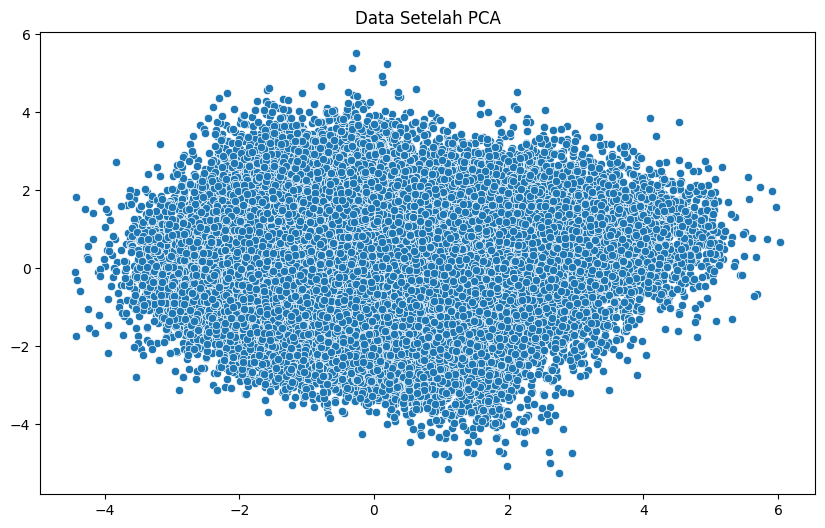

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1])
plt.title('Data Setelah PCA')
plt.show()

In [85]:
sse = []
sil_scores = []
range_n_clusters = range(2, 10)

In [86]:
mini_batch_kmeans = MiniBatchKMeans(n_clusters=9, random_state=42, batch_size=100)
cluster_labels = mini_batch_kmeans.fit_predict(features_scaled)

C:\Users\Satriock\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [88]:
silhouette_avg = silhouette_score(features_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.028315310364203768


In [89]:
result = pd.DataFrame({'id': ids, 'predicted': cluster_labels})
result.to_csv('clustered_dataset_minibatchkmeans1.csv', index=False)